# Section 1

In this notebook, we prepare plots for Section 1 of the manuscript.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import torch
import torch.nn as nn
import torch.nn.functional as F

from NegativeClassOptimization import utils, preprocessing, ml

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
# df below is loaded based on the experiment ids, from mlflow.
# We can actually load it from file now, since we saved it.
# We also need a script to compute it from scratch, based on SWA for example.
# This will be added later, after dealing with the open set performances, where
# we need to compute the results from scratch anyway.
experiment_ids = ["11", "13", "14"]
df = utils.MLFlowTaskAPI.mlflow_results_as_dataframe(experiment_ids, run_name="dev-v0.1.2-3-with-replicates", classify_tasks=True)

## To load from file, uncomment the following line. But for now, we
## need to compute it from scratch, since we are implementing some modifications.
# base_p = Path(config.DATA_BASE_PATH) / "Frozen_MiniAbsolut_ML"
# df = pd.read_csv(base_p / "df_task_data.tsv", sep='\t')

KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.
KeyError in `mlflow_record_data`.


In [3]:
print(df.columns)
df.head()

Index(['sample_train', 'load_from_miniabsolut_split_seed', 'optimizer_type',
       'ag_neg', 'batch_size', 'epochs', 'num_hidden_units', 'N_closed',
       'N_train', 'split_id', 'ag_pos', 'swa', 'shuffle_antigen_labels',
       'input_dim', 'learning_rate', 'weight_decay', 'momentum', 'seed_id',
       'load_from_miniabsolut', 'acc_closed', 'train_loss', 'roc_auc_closed',
       'f1_closed', 'avg_precision_closed', 'precision_closed', 'test_loss',
       'recall_closed', 'mlflow.source.git.commit', 'mlflow.note.content',
       'mlflow.source.type', 'mlflow.runName', 'mlflow.source.name',
       'mlflow.log-model.history', 'mlflow.user', 'experiment', 'run_id',
       'task'],
      dtype='object')


,sample_train,load_from_miniabsolut_split_seed,optimizer_type,ag_neg,batch_size,epochs,num_hidden_units,N_closed,N_train,split_id,...,mlflow.source.git.commit,mlflow.note.content,mlflow.source.type,mlflow.runName,mlflow.source.name,mlflow.log-model.history,mlflow.user,experiment,run_id,task
0,None,4,Adam,1H0D,64,50,10,10000,30000,0,...,4a705699e06b6c53e8799c26571fc6c360ed4f22,1OB1 vs 1H0D,LOCAL,dev-v0.1.2-3-with-replicates,scripts/script_12a_train_SN10_clean.py,"[{""run_id"": ""45e7f26f9d494b7cb2302f6f13c4bf55""...",eugen,11,45e7f26f9d494b7cb2302f6f13c4bf55,1v1
1,None,4,Adam,3VRL,64,50,10,10000,30000,0,...,4a705699e06b6c53e8799c26571fc6c360ed4f22,1OB1 vs 3VRL,LOCAL,dev-v0.1.2-3-with-replicates,scripts/script_12a_train_SN10_clean.py,"[{""run_id"": ""32f8fd48823c40c5bba365c9243e02de""...",eugen,11,32f8fd48823c40c5bba365c9243e02de,1v1
2,None,4,Adam,1FBI,64,50,10,10000,30000,0,...,4a705699e06b6c53e8799c26571fc6c360ed4f22,1OB1 vs 1FBI,LOCAL,dev-v0.1.2-3-with-replicates,scripts/script_12a_train_SN10_clean.py,"[{""run_id"": ""4f0eb2a80be645e3b6852c649537a693""...",eugen,11,4f0eb2a80be645e3b6852c649537a693,1v1
3,None,4,Adam,1WEJ,64,50,10,10000,30000,0,...,4a705699e06b6c53e8799c26571fc6c360ed4f22,1OB1 vs 1WEJ,LOCAL,dev-v0.1.2-3-with-replicates,scripts/script_12a_train_SN10_clean.py,"[{""run_id"": ""6c6537db1ea246da8ab39ab5b5a8749b""...",eugen,11,6c6537db1ea246da8ab39ab5b5a8749b,1v1
4,None,4,Adam,1NSN,64,50,10,10000,30000,0,...,4a705699e06b6c53e8799c26571fc6c360ed4f22,1OB1 vs 1NSN,LOCAL,dev-v0.1.2-3-with-replicates,scripts/script_12a_train_SN10_clean.py,"[{""run_id"": ""87a555c5f8fb4a92b497369e3113f76b""...",eugen,11,87a555c5f8fb4a92b497369e3113f76b,1v1


In [4]:
df["load_from_miniabsolut_split_seed"].value_counts()

None    600
4       120
3       120
2       120
1       120
0       120
Name: load_from_miniabsolut_split_seed, dtype: int64

In [5]:
df["seed_id"].value_counts()

0    840
3    120
2    120
1    120
Name: seed_id, dtype: int64

## 1A. Performances across tasks
### 1A1 - 1v1 performances

In [6]:
df_11 = df.loc[df["experiment"] == "11"].copy()
df_11["ags_sorted"] = df_11[["ag_pos", "ag_neg"]].apply(lambda x: "_".join(sorted(x)), axis=1)
df_11["ag_1"] = df_11[["ag_pos", "ag_neg"]].apply(lambda x: sorted(x)[0], axis=1)
df_11["ag_2"] = df_11[["ag_pos", "ag_neg"]].apply(lambda x: sorted(x)[1], axis=1)

Difference between (+,-) and (-,+). Generally below 0.3%. 2 cases of 0.5%. Can be ignored. Difference is of the same order as replicates. Sorting the performance by ag_pos or ag_neg leads to the same order (not shown now).

<AxesSubplot: ylabel='Frequency'>

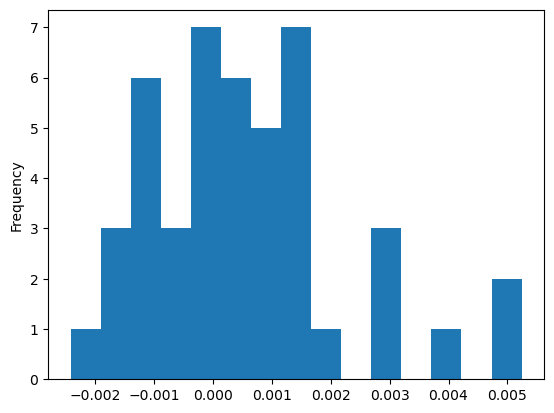

In [7]:
records = []
for ags_sorted in df_11.ags_sorted.unique():
    ag_1 = ags_sorted.split("_")[0]
    ag_2 = ags_sorted.split("_")[1]

    mask_p = (df_11["ag_pos"] == ag_1) & (df_11["ag_neg"] == ag_2)
    mask_n = (df_11["ag_pos"] == ag_2) & (df_11["ag_neg"] == ag_1)

    p_avg = df_11.loc[mask_p]["acc_closed"].mean()
    # p_std = df_11.loc[mask_p]["acc_closed"].std()
    n_avg = df_11.loc[mask_n]["acc_closed"].mean()
    # n_std = df_11.loc[mask_n]["acc_closed"].std()

    records.append({
        "ag_1": ag_1,
        "ag_2": ag_2,
        "ags_sorted": ags_sorted,
        "p_avg": p_avg,
        "n_avg": n_avg,
        "diff": p_avg - n_avg,
    })

df_11_diff = pd.DataFrame(records)
df_11_diff["diff"].plot.hist(bins=15)

When aggregating by ags_sorted, we get low stds (~0.5% is max, but most are around 0.1%), so that, differences of >1% are significant.

In [8]:
df_11.groupby("ags_sorted")["acc_closed"].agg(["mean", "std"]).sort_values("mean", ascending=False)

,mean,std
ags_sorted,,
1FBI_3VRL,0.994135,0.000758
1H0D_1OB1,0.992825,0.000648
1FBI_1NSN,0.992070,0.001312
1FBI_1H0D,0.990965,0.002083
1NSN_3VRL,0.990545,0.000798
1FBI_1OB1,0.990495,0.000709
1H0D_3VRL,0.990195,0.000965
2YPV_3VRL,0.989785,0.001281
1OB1_3VRL,0.987055,0.001286


<AxesSubplot: xlabel='ag_pos', ylabel='acc_closed'>

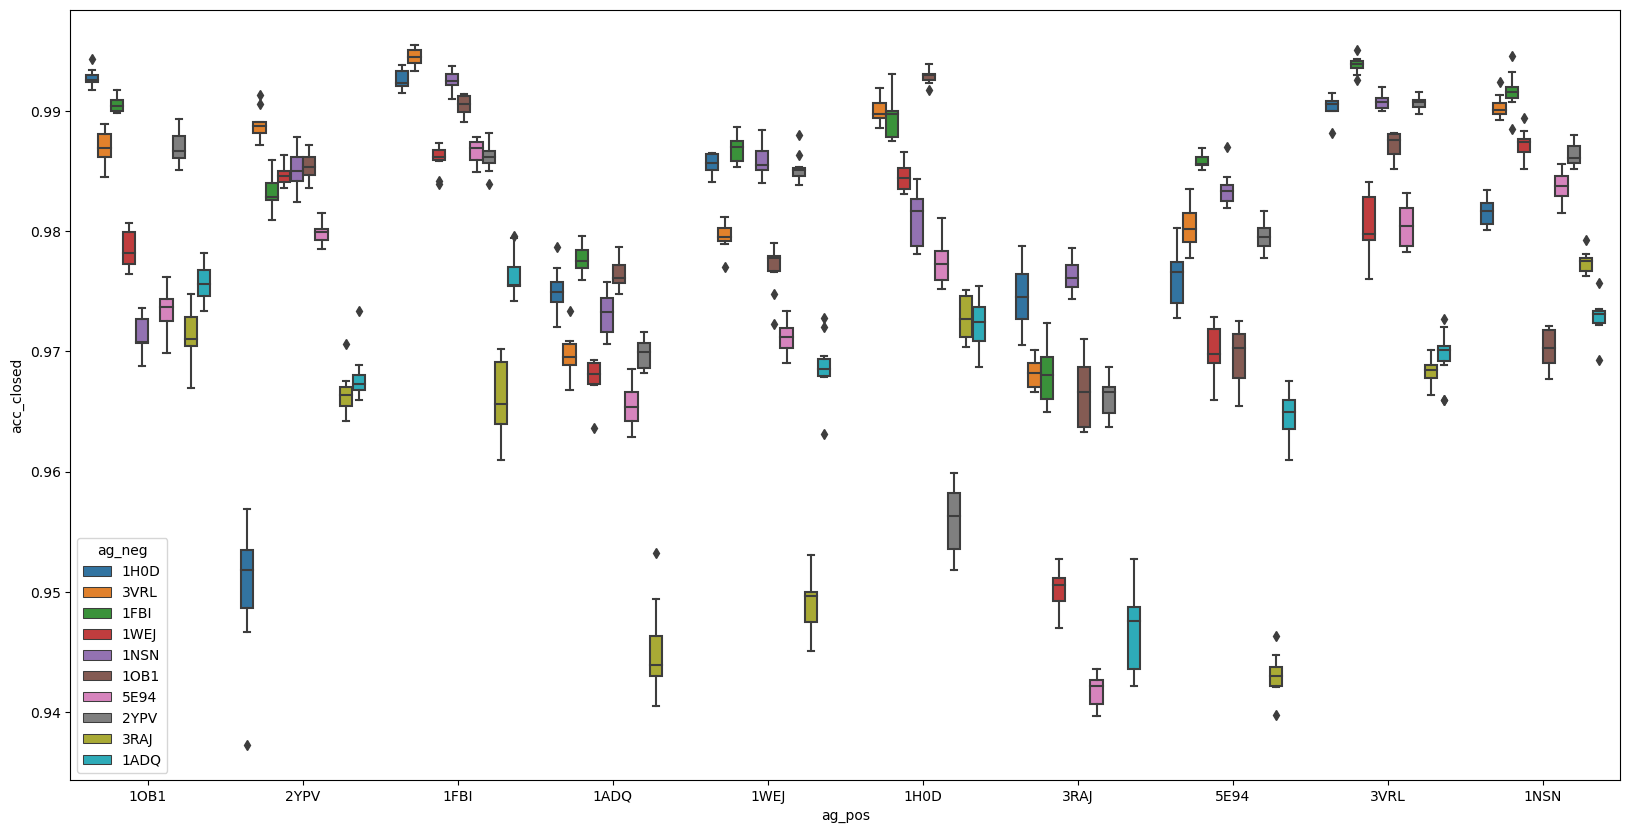

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(
    x="ag_pos",
    y="acc_closed",
    hue="ag_neg",
    data=df_11,
    ax=ax,
)

<AxesSubplot: xlabel='(acc_closed, mean)', ylabel='(acc_closed, std)'>

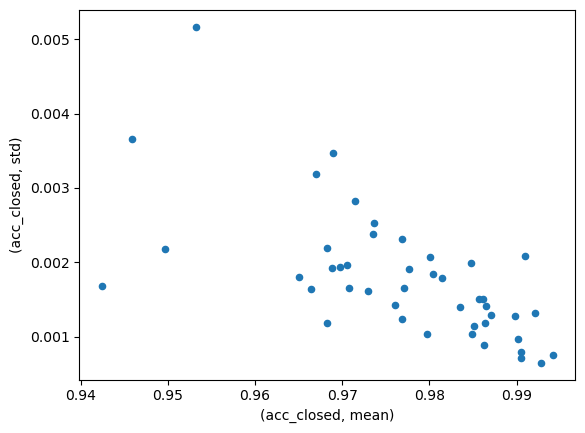

In [10]:
df_11.groupby(["ag_1", "ag_2"]).agg({"acc_closed": ["mean", "std"]}).plot(
    x=("acc_closed", "mean"),
    y=("acc_closed", "std"),
    kind="scatter",
)

In [11]:
df_11_g = df_11.groupby(["ag_1", "ag_2"]).agg("mean")["acc_closed"]

df_11_m = pd.DataFrame(np.zeros((10, 10)), columns=df_11.ag_pos.unique(), index=df_11.ag_pos.unique())
for ag_pos in df_11.ag_pos.unique():
    for ag_neg in df_11.ag_neg.unique():
        if ag_pos == ag_neg:
            continue
        else:
            ag_1 = sorted([ag_pos, ag_neg])[0]
            ag_2 = sorted([ag_pos, ag_neg])[1]
            df_11_m.loc[ag_pos, ag_neg] = df_11_g[ag_1][ag_2]
            df_11_m.loc[ag_neg, ag_pos] = df_11_g[ag_1][ag_2]

/tmp/ipykernel_172564/1146087541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_11_g = df_11.groupby(["ag_1", "ag_2"]).agg("mean")["acc_closed"]


<AxesSubplot: >

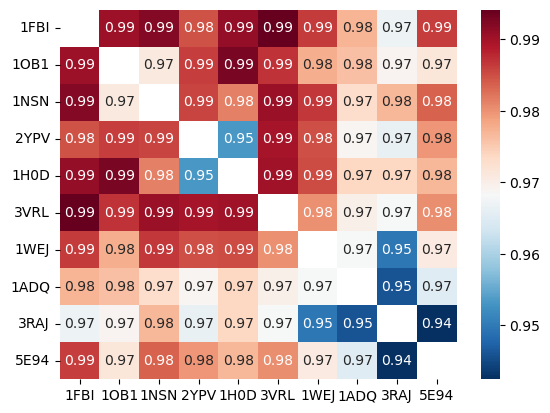

In [12]:
# sns.clustermap(df_11_m, annot=True, cmap="RdBu_r", mask=df_11_m==0)
# g = sns.clustermap(df_11_m, annot=True, cmap="RdBu_r", mask=np.tri(df_11_m.values.shape[0], k=0))

## Doesn't achieve clustermap with mask.
# https://stackoverflow.com/questions/67879908/lower-triangle-mask-with-seaborn-clustermap
# mask = np.tril(np.ones_like(df_11_m))
# values = g.ax_heatmap.collections[0].get_array().reshape(df_11_m.shape)
# new_values = np.ma.array(values, mask=mask)
# g.ax_heatmap.collections[0].set_array(new_values)
# plt.show()

## To get a clustermap with masks, I hardcode the order from the clustermap.
order = ["5E94", "3RAJ", "1ADQ", "1WEJ", "3VRL", "1H0D", "2YPV", "1NSN", "1OB1", "1FBI"]
df_11_m = df_11_m.loc[order[::-1], order[::-1]]
# sns.heatmap(df_11_m, annot=True, cmap="RdBu_r", mask=np.tri(df_11_m.values.shape[0], k=0))
sns.heatmap(df_11_m, annot=True, cmap="RdBu_r", mask=df_11_m.values == 0)

In [146]:
m = df_11_m.values
m = m[m>0]
m.mean(), m.std()

(0.9768927777777779, 0.012281440222979436)

High standard deviations when considering all combinations containing an antigen (stds ~ 1%), but statistically significant differences.

In [13]:
# Statistical test
from itertools import combinations
from scipy.stats import ttest_ind
records = []
for ag_i, ag_j in combinations(df_11.ag_pos.unique(), 2):
    if ag_i == ag_j:
        continue
    mask_i = (df_11["ag_1"] == ag_i) | (df_11["ag_2"] == ag_i)
    mask_j = (df_11["ag_1"] == ag_j) | (df_11["ag_2"] == ag_j)
    t, p = ttest_ind(df_11.loc[mask_i]["acc_closed"], df_11.loc[mask_j]["acc_closed"])
    records.append({
        "ag_i": ag_i,
        "ag_j": ag_j,
        "t": t,
        "p": p,
    })
df_11_stats = pd.DataFrame(records).sort_values("p", ascending=True)
print(df_11_stats.head(10))
print(df_11_stats.tail(10))

# Tabular
records = []
for ag in df_11.ag_pos.unique():
    mask = (df_11["ag_1"] == ag) | (df_11["ag_2"] == ag)
    acc_avg = df_11.loc[mask]["acc_closed"].mean()
    acc_std = df_11.loc[mask]["acc_closed"].std()
    records.append({
        "ag": ag,
        "acc": acc_avg,
        "acc_std": acc_std,
        "acc_range": f'{df_11.loc[mask]["acc_closed"].min()} - {df_11.loc[mask]["acc_closed"].max()}',
        "acc_range_est": f"{acc_avg - 2*acc_std:.3f} - {min(acc_avg + 2*acc_std, 1.0):.3f}",
    })
pd.DataFrame(records).sort_values("acc", ascending=False)

    ag_i  ag_j          t             p
20  1FBI  3RAJ  21.230891  2.494091e-65
41  3RAJ  1NSN -19.101725  1.395175e-56
40  3RAJ  3VRL -18.791898  2.636827e-55
17  1FBI  1ADQ  18.384364  1.258865e-53
5   1OB1  3RAJ  16.075014  3.721395e-44
29  1ADQ  1NSN -15.833300  3.575447e-43
28  1ADQ  3VRL -15.469618  1.064015e-41
35  1H0D  3RAJ  13.855159  2.992645e-35
13  2YPV  3RAJ  12.353083  1.918557e-29
2   1OB1  1ADQ  12.235183  5.351503e-29
    ag_i  ag_j         t         p
32  1WEJ  5E94  2.851231  0.004608
30  1WEJ  1H0D -2.556987  0.010970
8   1OB1  1NSN -2.510576  0.012494
38  1H0D  1NSN -2.438776  0.015222
22  1FBI  3VRL  2.317428  0.021044
0   1OB1  2YPV  2.231070  0.026295
12  2YPV  1H0D -1.630893  0.103792
44  3VRL  1NSN  1.244406  0.214164
11  2YPV  1WEJ  0.924887  0.355648
4   1OB1  1H0D  0.366876  0.713928


,ag,acc,acc_std,acc_range,acc_range_est
2,1FBI,0.985455,0.008272,0.961 - 0.9955,0.969 - 1.000
8,3VRL,0.983346,0.008980,0.966 - 0.9955,0.965 - 1.000
9,1NSN,0.982280,0.007175,0.9677 - 0.9946,0.968 - 0.997
0,1OB1,0.980154,0.008806,0.9633 - 0.9943,0.963 - 0.998
5,1H0D,0.979749,0.011934,0.9373 - 0.9943,0.956 - 1.000
1,2YPV,0.977714,0.011741,0.9373 - 0.9916,0.954 - 1.000
4,1WEJ,0.976576,0.011611,0.9451 - 0.9894,0.953 - 1.000
7,5E94,0.972924,0.012662,0.9397 - 0.9878,0.948 - 0.998
3,1ADQ,0.968611,0.009092,0.9405 - 0.9796,0.950 - 0.987
6,3RAJ,0.962118,0.012209,0.9397 - 0.9793,0.938 - 0.987


### 1A2 - looser, 95low and 1v9 performances.

In [14]:
import warnings


# Include 1v1 average performance
warnings.warn("This is not correct, because it's not the same 1v1 as in the other experiments. Need to aggregate over all.")

df_13 = df.loc[df["experiment"].isin(["11", "13", "14"])].copy()
df_13["ag_pos"] = df_13["ag_pos"].apply(lambda x: x.split("_")[0])

# Get order of antigens by high_vs_looser performance
ag_order = df_13.loc[df_13["task"] == "high_vs_looser"].groupby("ag_pos")["acc_closed"].mean().sort_values(ascending=False).index.to_list()

/tmp/ipykernel_172564/1123551908.py:5: UserWarning: This is not correct, because it's not the same 1v1 as in the other experiments. Need to aggregate over all.
  warnings.warn("This is not correct, because it's not the same 1v1 as in the other experiments. Need to aggregate over all.")


Text(0.5, 1.0, 'Performance of antigens in different tasks')

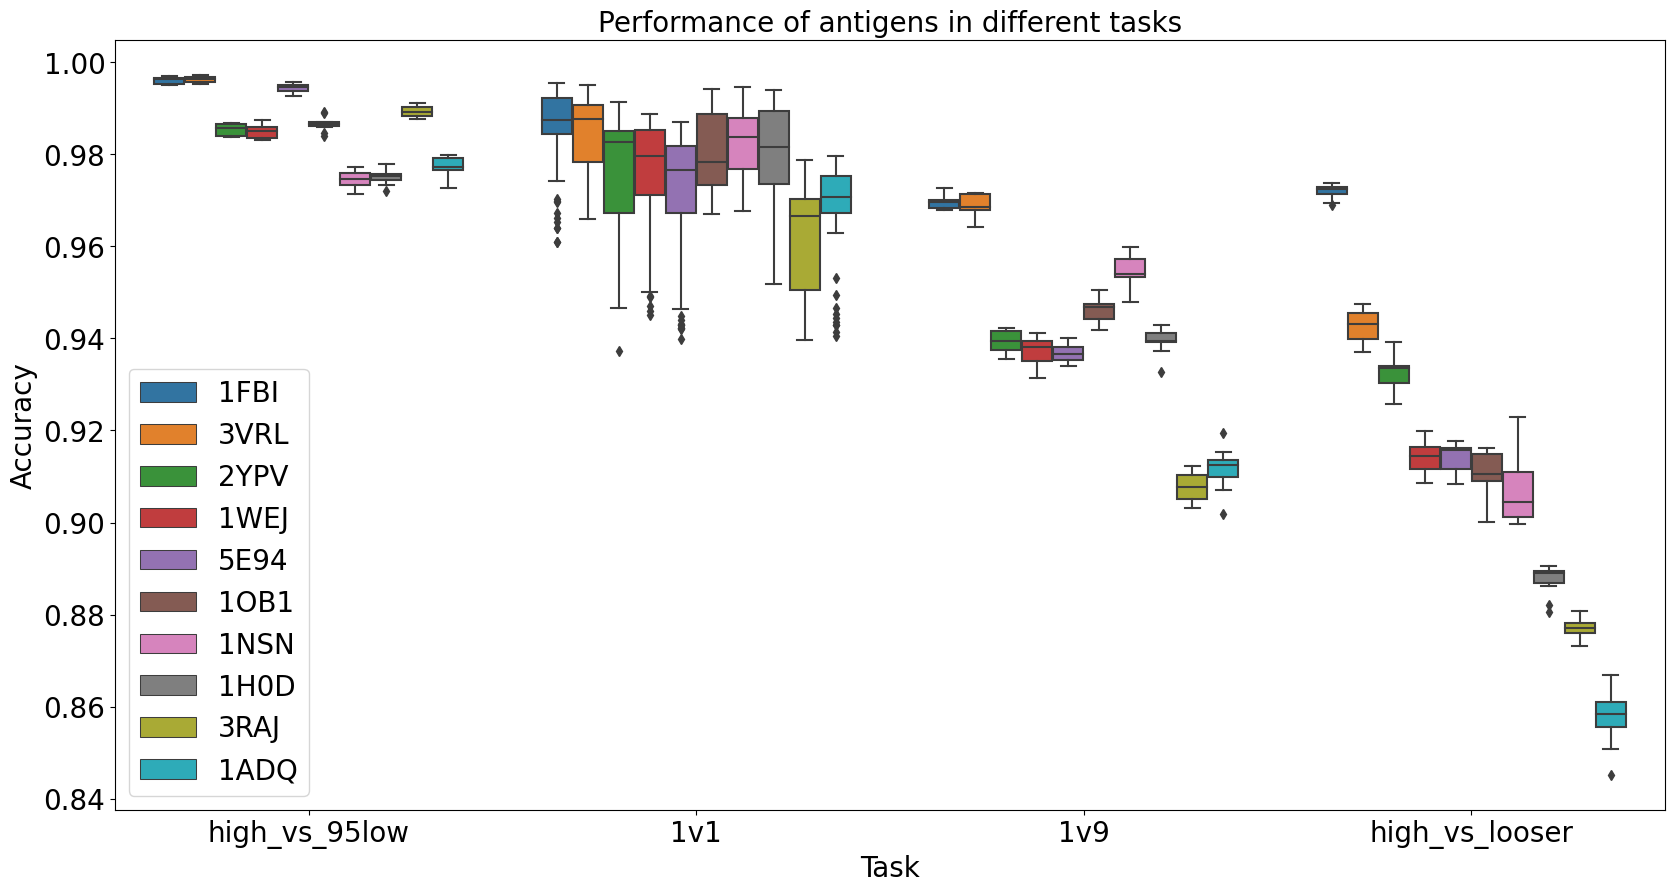

In [152]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(
    x="task",
    y="acc_closed",
    hue="ag_pos",
    data=df_13,
    ax=ax,
    # Order on x axis
    order=["high_vs_95low", "1v1", "1v9", "high_vs_looser"],
    hue_order=ag_order,
)

# Legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Font 20
ax.tick_params(labelsize=20)
# Legend font 20
ax.legend(fontsize=20)
# Axis labels font 20
ax.set_xlabel("Task", fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)

# Title
ax.set_title("Performance of antigens in different tasks", fontsize=20)

In [154]:
df_13.groupby("task")["acc_closed"].agg(["mean", "std"])

,mean,std
task,,
1v1,0.976893,0.012438
1v9,0.941164,0.019840
high_vs_95low,0.985988,0.008037
high_vs_looser,0.911538,0.031738


Text(0.5, 1.0, 'Performance of antigens in different tasks')

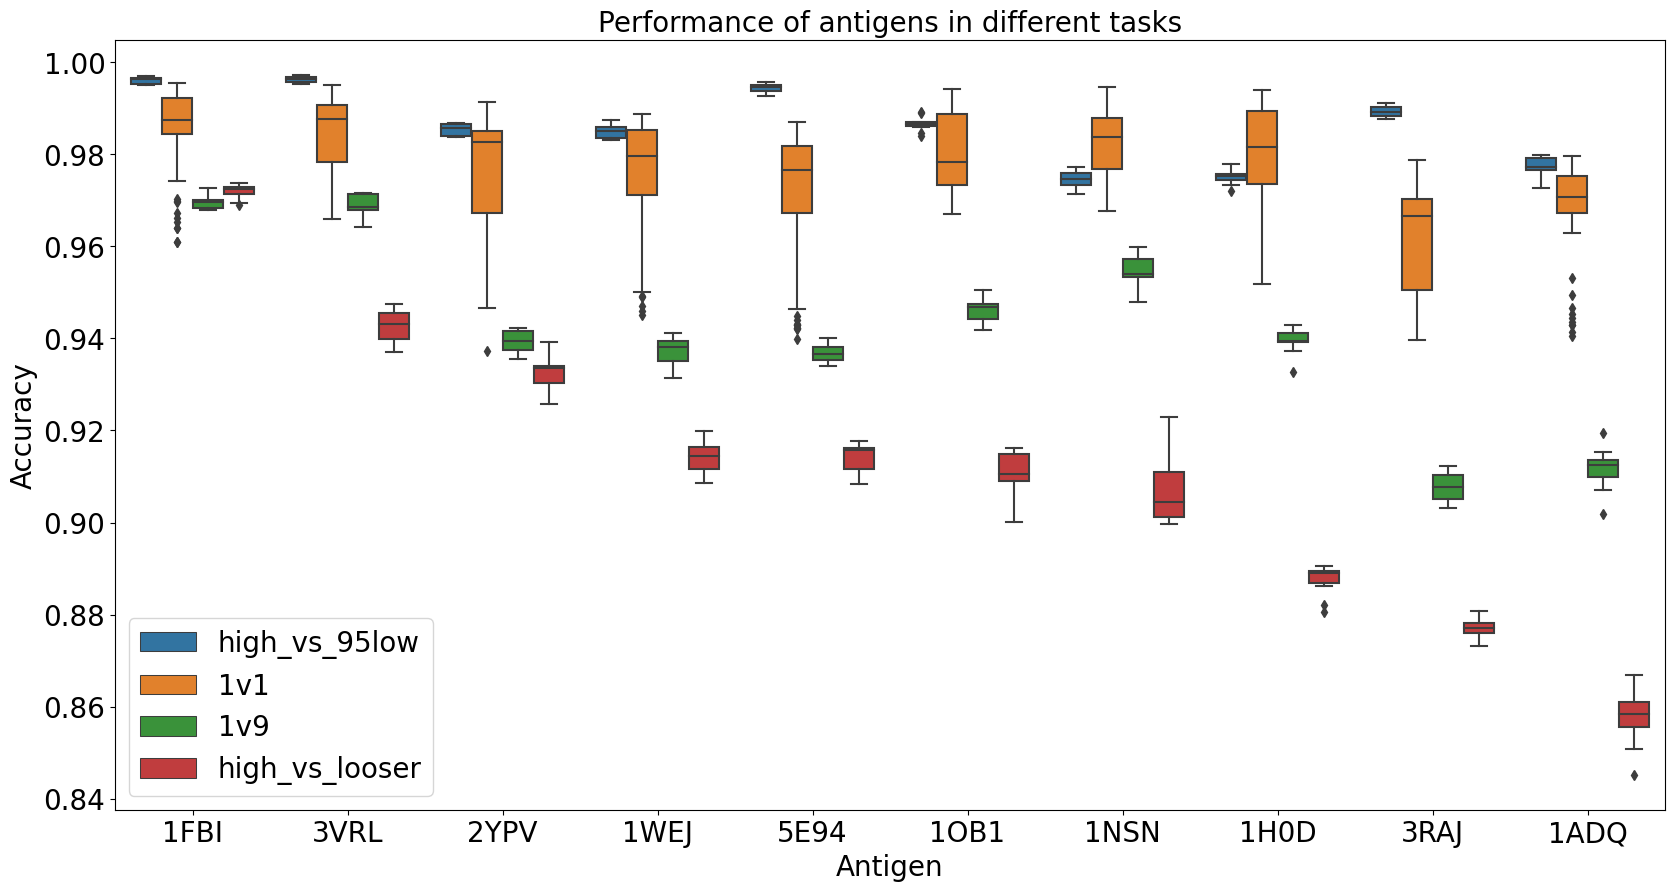

In [153]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(
    x="ag_pos",
    y="acc_closed",
    hue="task",
    data=df_13,
    ax=ax,
    order=ag_order,
    hue_order=["high_vs_95low", "1v1", "1v9", "high_vs_looser"],
    
)

# Legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Font 20
ax.tick_params(labelsize=20)
# Legend font 20
ax.legend(fontsize=20)
# Axis labels font 20
ax.set_xlabel("Antigen", fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)

# Title
ax.set_title("Performance of antigens in different tasks", fontsize=20)

In [157]:
df_13.groupby("ag_pos")["acc_closed"].agg(["mean", "std"]).sort_values("mean", ascending=False)

,mean,std
ag_pos,,
1FBI,0.984053,0.010145
3VRL,0.979975,0.014916
1NSN,0.973103,0.022567
1OB1,0.972565,0.022378
2YPV,0.970809,0.019020
1WEJ,0.968802,0.022504
1H0D,0.968194,0.028538
5E94,0.966483,0.022703
1ADQ,0.955540,0.034844


In [17]:
@np.vectorize
def get_ag_order_index(ag, ag_order=ag_order):
    return ag_order.index(ag)

df_13 = df_13.sort_values(["ag_pos"], key=get_ag_order_index)

<AxesSubplot: xlabel='ag_pos', ylabel='acc_closed'>

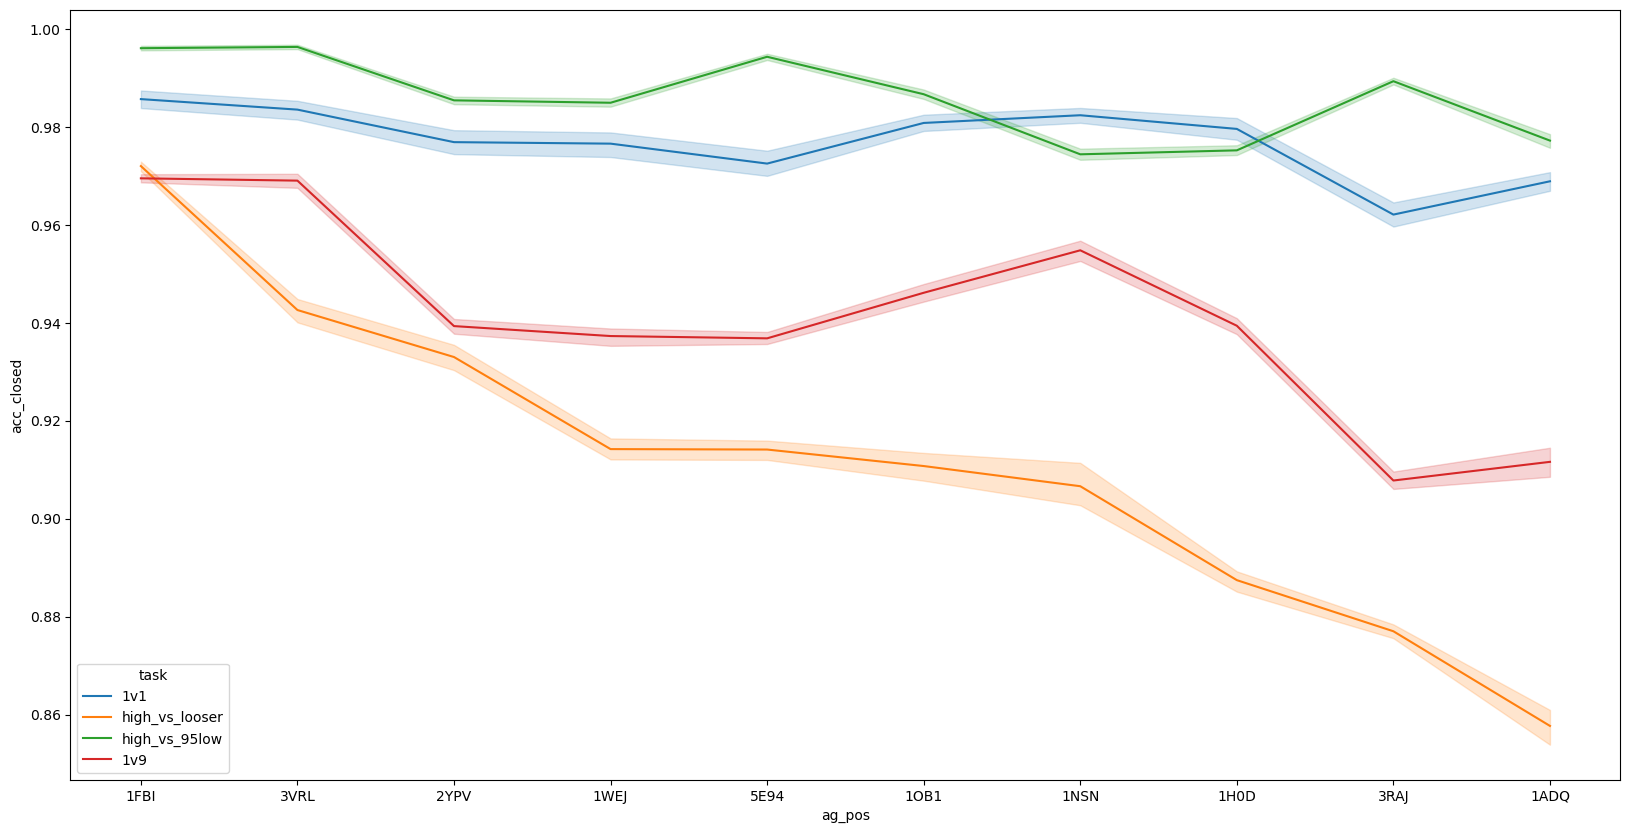

In [18]:
# Seaborn lineplot, x-axis is categorical
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(
    x="ag_pos",
    y="acc_closed",
    hue="task",
    data=df_13,
    ax=ax,
)

## 2. Explaining the results.

### 2.1 Normalized Lempel-Ziv Complexity

In [36]:
from NegativeClassOptimization import config

base_p = Path("../data/MiniAbsolut")
slides = {}
for ag in config.ANTIGENS:
    dir_p = base_p / ag
    
    slides_high = pd.read_csv(dir_p / "high_test_5000.tsv", sep='\t')["Slide"].tolist()
    slides[f"{ag}_high"] = slides_high
    
    slides_looser = pd.read_csv(dir_p / "looserX_test_5000.tsv", sep='\t')["Slide"].tolist()
    slides[f"{ag}_looser"] = slides_looser
    
    slides_95low = pd.read_csv(dir_p / "95low_test_5000.tsv", sep='\t')["Slide"].tolist()
    slides[f"{ag}_95low"] = slides_95low

In [38]:
from NegativeClassOptimization import ait


def compute_nlzc(slides, num_shuffles=10):
    lzc = ait.estimate_lzc(num_shuffles, slides)
    N = ait.lzc_numchars(slides)
    nlzc = lzc/N
    return nlzc


records = []
for ag, slides_i in slides.items():
    records.append({
        "ag": ag, 
        "nlzc": compute_nlzc(slides_i),
    })
df_nlzc = pd.DataFrame(records)
df_nlzc

,ag,nlzc
0,3VRL_high,0.190375
1,3VRL_looser,0.199190
2,3VRL_95low,0.202230
3,1NSN_high,0.202195
4,1NSN_looser,0.208557
5,1NSN_95low,0.208195
6,3RAJ_high,0.203888
7,3RAJ_looser,0.206098
8,3RAJ_95low,0.205357
9,5E94_high,0.193125


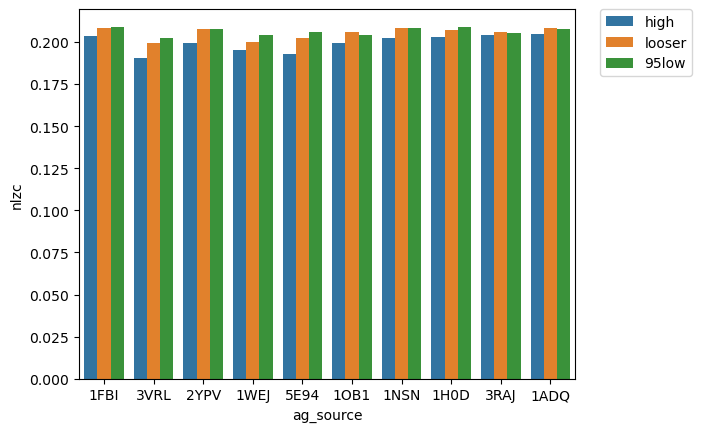

In [39]:
df_nlzc["ag_source"] = df_nlzc["ag"].apply(lambda x: x.split("_")[0])
df_nlzc["ag_aff"] = df_nlzc["ag"].apply(lambda x: x.split("_")[1])


sns.barplot(
    x="ag_source",
    y="nlzc",
    hue="ag_aff",
    data=df_nlzc,
    order=ag_order,

)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2.2 Entropy of slides

In [158]:
from Bio import motifs
from Bio.Seq import Seq
from scipy.stats import entropy


def entropy_slides(slides):

    # Create a list of Seq objects
    seqs = [Seq(slide) for slide in slides]

    # Create a motifs instance
    m = motifs.create(seqs, alphabet=config.AMINOACID_ALPHABET)

    # Get the position weight matrix
    pwm: np.ndarray = pd.DataFrame(m.pwm).values
    pwm += 1e-20  # Avoid log(0)

    # Compute entropy of a position-weight matrix
    return entropy(pwm, axis=1, base=2).sum()
    # return -np.sum(pwm * np.log(pwm), axis=1).sum()  # Same as entropy, checked

entropy_slides(slides["1ADQ_high"])

37.187994400227936

In [159]:
records = []
for ag, slides_i in slides.items():
    records.append({
        "ag": ag, 
        "entropy": entropy_slides(slides_i),
    })
df_entropy = pd.DataFrame(records)
df_entropy

,ag,entropy
0,3VRL_high,30.543936
1,3VRL_looser,34.338510
2,3VRL_95low,35.372931
3,1NSN_high,33.960999
4,1NSN_looser,37.118968
5,1NSN_95low,37.688359
6,3RAJ_high,36.409785
7,3RAJ_looser,37.586293
8,3RAJ_95low,37.083648
9,5E94_high,33.090477


Text(0.5, 1.0, 'Entropy of slides')

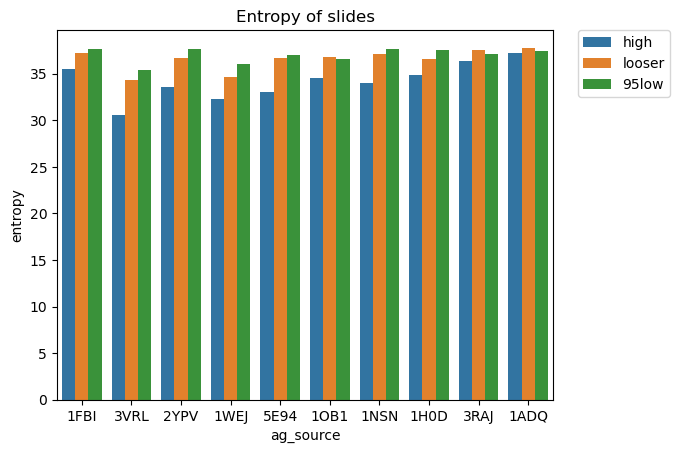

In [161]:
df_entropy["ag_source"] = df_entropy["ag"].apply(lambda x: x.split("_")[0])
df_entropy["ag_aff"] = df_entropy["ag"].apply(lambda x: x.split("_")[1])


sns.barplot(
    x="ag_source",
    y="entropy",
    hue="ag_aff",
    data=df_entropy,
    order=ag_order,

)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Entropy of slides")

<AxesSubplot: xlabel='nlzc', ylabel='entropy'>

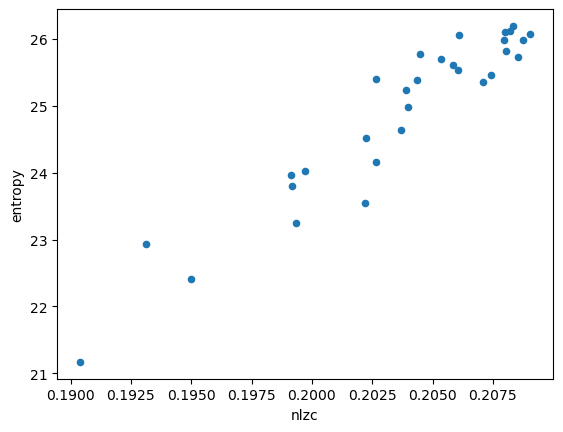

In [62]:
df_it = pd.merge(df_nlzc, df_entropy, on=["ag", "ag_source", "ag_aff"])
df_it.plot.scatter(x="nlzc", y="entropy")

### 2.3 Mutual Information

In [85]:
# Compute Jeffreys Divergence
from Bio import motifs
from Bio.Seq import Seq
from scipy.stats import entropy


def jensen_shannon_divergence_slides(slides_1, slides_2):
    
    # Create a list of Seq objects
    seqs_1 = [Seq(slide) for slide in slides_1]
    seqs_2 = [Seq(slide) for slide in slides_2]

    # Create a motifs instance
    m_1 = motifs.create(seqs_1, alphabet=config.AMINOACID_ALPHABET)
    m_2 = motifs.create(seqs_2, alphabet=config.AMINOACID_ALPHABET)

    # Get the position weight matrix
    pwm_1: np.ndarray = pd.DataFrame(m_1.pwm).values
    pwm_1 += 1e-20  # Avoid log(0)
    pwm_2: np.ndarray = pd.DataFrame(m_2.pwm).values
    pwm_2 += 1e-20  # Avoid log(0)

    # Compute entropy of a position-weight matrix
    rel_entropy_forward = entropy(pwm_1, pwm_2, axis=1).sum()
    rel_entropy_backward = entropy(pwm_2, pwm_1, axis=1).sum()
    
    # Checked that the following is the same as based on scipy.stats.entropy
    # rel_entropy_forward = np.sum(pwm_1 * np.log(pwm_1 / pwm_2), axis=1).sum()
    # rel_entropy_backward = np.sum(pwm_2 * np.log(pwm_2 / pwm_1), axis=1).sum()
    
    return 1/2 * (rel_entropy_forward + rel_entropy_backward)

In [91]:
L = len(slides)
m = np.zeros((L, L))
df_jsd = pd.DataFrame(m, columns=slides.keys(), index=slides.keys())

for ag_i, slides_i in slides.items():
    for ag_j, slides_j in slides.items():
        if ag_i == ag_j:
            continue
        df_jsd.loc[ag_i, ag_j] = jensen_shannon_divergence_slides(slides_i, slides_j)

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


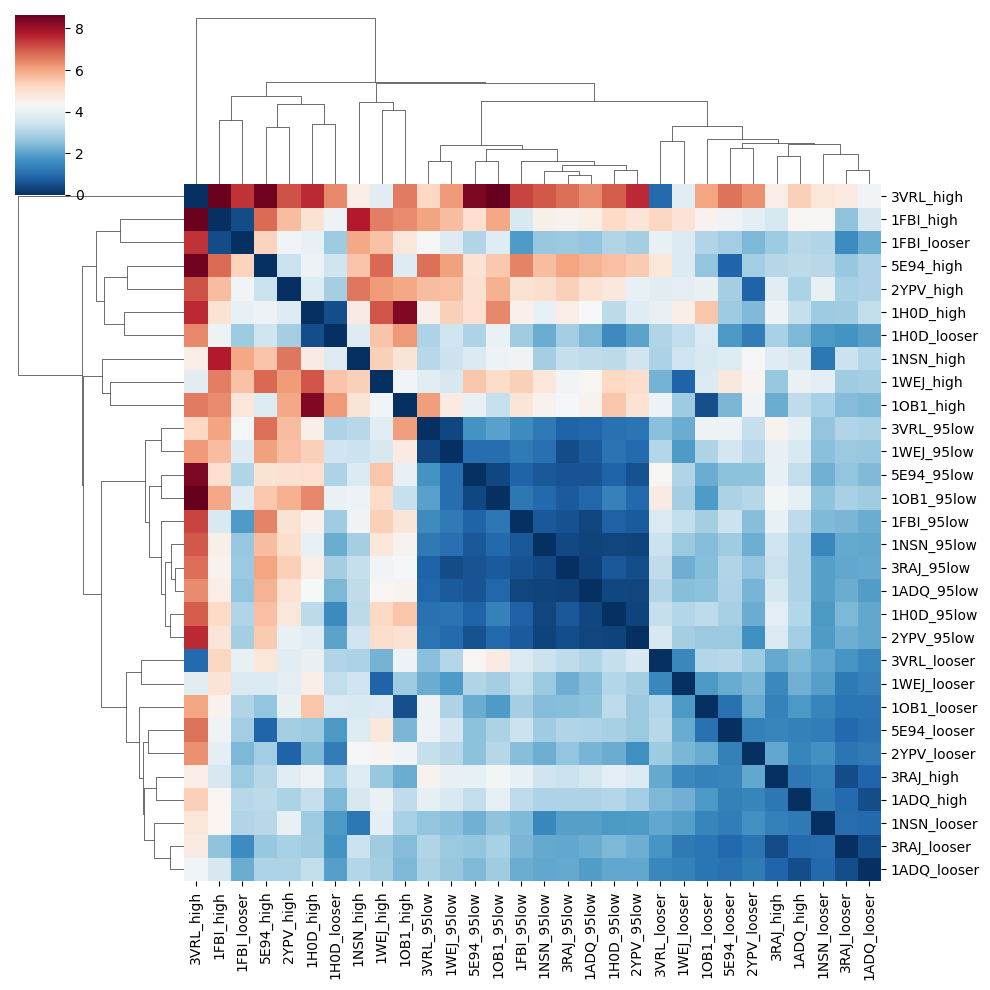

In [93]:
sns.clustermap(
    df_jsd,
    cmap="RdBu_r",
    xticklabels=True,
    yticklabels=True,
    figsize=(10, 10),
)

In [95]:
records = []
for ag in config.ANTIGENS:
    h_vs_l = df_jsd.loc[f"{ag}_high", f"{ag}_looser"]
    h_vs_95 = df_jsd.loc[f"{ag}_high", f"{ag}_95low"]
    records.append({
        "ag": ag,
        "h_vs_l": h_vs_l,
        "h_vs_95": h_vs_95,
    })
df_jsd_p = pd.DataFrame(records)

<AxesSubplot: xlabel='ag', ylabel='jsd'>

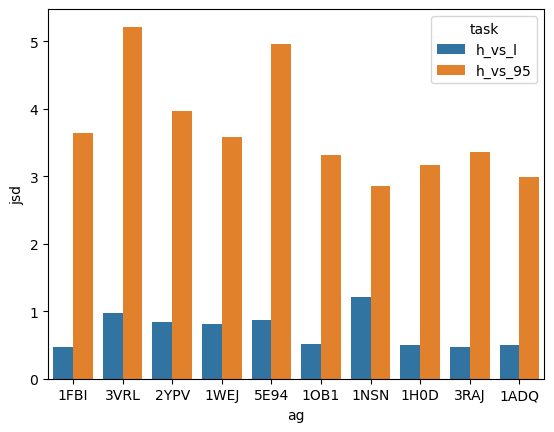

In [99]:
df_jsd_p = df_jsd_p.melt("ag", value_name="jsd", var_name="task")
sns.barplot(
    x="ag",
    y="jsd",
    hue="task",
    data=df_jsd_p,
    order=ag_order,
)

In [102]:
cols = [f"{ag}_high" for ag in config.ANTIGENS]
df_jsd_1v1 = df_jsd.loc[cols, cols].copy()
df_jsd_1v1.columns = [ag.split("_")[0] for ag in df_jsd_1v1.columns]
df_jsd_1v1.index = [ag.split("_")[0] for ag in df_jsd_1v1.index]
df_jsd_1v1

,3VRL,1NSN,3RAJ,5E94,1H0D,1WEJ,1ADQ,1FBI,2YPV,1OB1
3VRL,0.000000,4.643458,4.643769,8.530087,7.535694,3.825169,5.367809,8.599575,7.078334,6.571519
1NSN,4.643458,0.000000,3.789592,5.555093,4.661064,5.362721,3.612893,7.742956,6.649991,4.905636
3RAJ,4.643769,3.789592,0.000000,3.092641,4.057529,2.688969,1.206827,3.613377,3.840061,2.163651
5E94,8.530087,5.555093,3.092641,0.000000,4.080217,6.821335,3.145086,6.783025,3.376323,3.729334
1H0D,7.535694,4.661064,4.057529,4.080217,0.000000,7.041914,3.297099,4.933469,3.741444,8.318390
1WEJ,3.825169,5.362721,2.688969,6.821335,7.041914,0.000000,4.026903,6.523888,6.154916,4.181050
1ADQ,5.367809,3.612893,1.206827,3.145086,3.297099,4.026903,0.000000,4.415288,2.971244,3.236139
1FBI,8.599575,7.742956,3.613377,6.783025,4.933469,6.523888,4.415288,0.000000,5.644737,6.351891
2YPV,7.078334,6.649991,3.840061,3.376323,3.741444,6.154916,2.971244,5.644737,0.000000,5.991936
1OB1,6.571519,4.905636,2.163651,3.729334,8.318390,4.181050,3.236139,6.351891,5.991936,0.000000


<AxesSubplot: >

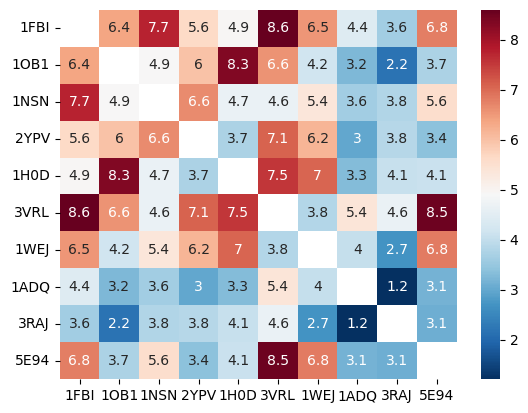

In [103]:
order = ["5E94", "3RAJ", "1ADQ", "1WEJ", "3VRL", "1H0D", "2YPV", "1NSN", "1OB1", "1FBI"]
df_jsd_1v1 = df_jsd_1v1.loc[order[::-1], order[::-1]]
sns.heatmap(df_jsd_1v1, annot=True, cmap="RdBu_r", mask=df_jsd_1v1.values == 0)

In [118]:
df_jsd_1v1_melt = df_jsd_1v1.reset_index().melt("index", value_name="jsd", var_name="ag").rename(columns={"index": "ag_1", "ag": "ag_2"})
df_11_m_melt = df_11_m.reset_index().melt("index", value_name="m", var_name="ag").rename(columns={"index": "ag_1", "ag": "ag_2", "m": "accuracy"})

<AxesSubplot: xlabel='jsd', ylabel='accuracy'>

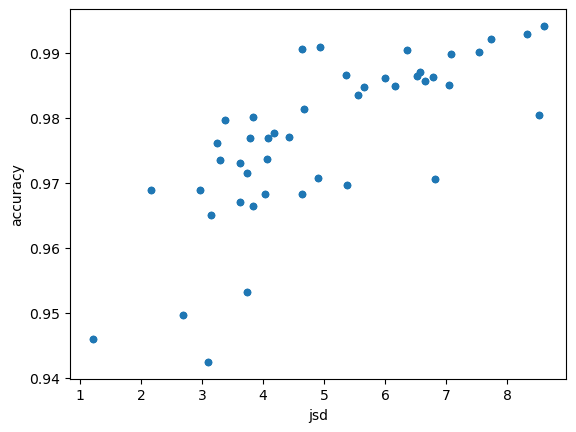

In [121]:
df_jsd_1v1_merged = pd.merge(df_jsd_1v1_melt, df_11_m_melt, on=["ag_1", "ag_2"])
df_jsd_1v1_merged = df_jsd_1v1_merged.loc[df_jsd_1v1_merged["accuracy"] != 0]
df_jsd_1v1_merged.plot.scatter(x="jsd", y="accuracy")

Text(0.5, 1.0, "Accuracy vs jeffrey's divergence")

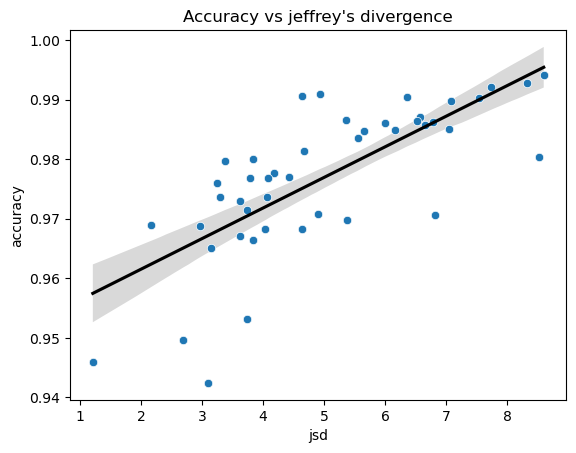

In [164]:
# Line plot in seaborn with R2 regression
sns.regplot(x="jsd", y="accuracy", data=df_jsd_1v1_merged, scatter=False, color="black")
sns.scatterplot(x="jsd", y="accuracy", data=df_jsd_1v1_merged)

# Compute Pearson correlation
from scipy.stats import pearsonr
pearsonr(df_jsd_1v1_merged["jsd"], df_jsd_1v1_merged["accuracy"])
# Title
plt.title(f"Accuracy vs jeffrey's divergence")

### 2.4 Wasserstein

In [125]:
import geomloss

loss = geomloss.SamplesLoss("sinkhorn", p=2, blur=0.05, scaling=0.9)

X = torch.rand((5000, 220))
Y = torch.rand((5000, 220))

loss(X, Y)

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


tensor(13.9514)

In [139]:
N = 1000

m = np.zeros((len(config.ANTIGENS), len(config.ANTIGENS)))
df_w = pd.DataFrame(m, columns=config.ANTIGENS, index=config.ANTIGENS)
for ag_i in config.ANTIGENS:
    for ag_j in config.ANTIGENS:

        if ag_i == ag_j:
            continue
        
        if df_w.loc[ag_i, ag_j] != 0 or df_w.loc[ag_j, ag_i] != 0:
            continue

        slides_onehot_i = np.stack([preprocessing.onehot_encode(slide) for slide in slides[f"{ag_i}_high"]])
        slides_onehot_j = np.stack([preprocessing.onehot_encode(slide) for slide in slides[f"{ag_j}_high"]])

        X = torch.tensor(slides_onehot_i)
        Y = torch.tensor(slides_onehot_j)

        # Sample N random sequences from each set
        X = X[torch.randperm(X.shape[0])[:N]]
        Y = Y[torch.randperm(Y.shape[0])[:N]]

        df_w.loc[ag_i, ag_j] = loss(X, Y).item()
        df_w.loc[ag_j, ag_i] = loss(X, Y).item()

<AxesSubplot: >

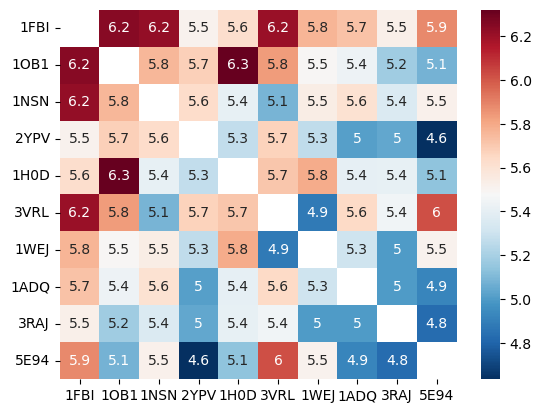

In [140]:
order = ["5E94", "3RAJ", "1ADQ", "1WEJ", "3VRL", "1H0D", "2YPV", "1NSN", "1OB1", "1FBI"]
df_w = df_w.loc[order[::-1], order[::-1]]
sns.heatmap(df_w, annot=True, cmap="RdBu_r", mask=df_w.values == 0)

In [142]:
df_w_melt = df_w.reset_index().melt("index", value_name="wasserstein", var_name="ag").rename(columns={"index": "ag_1", "ag": "ag_2"})
df_it_merged = pd.merge(df_jsd_1v1_merged, df_w_melt, on=["ag_1", "ag_2"], how="inner")

PearsonRResult(statistic=0.6286197812220303, pvalue=3.273916800312176e-11)

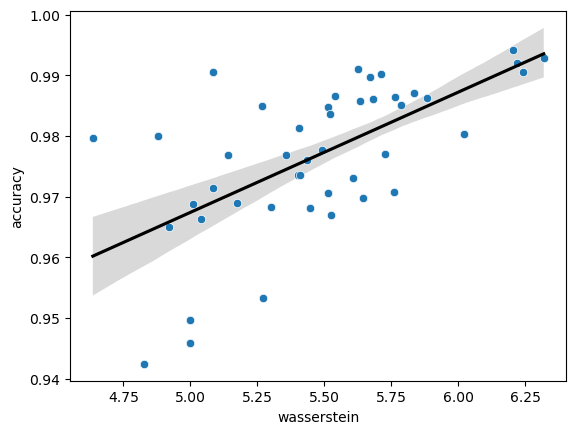

In [145]:
# Line plot in seaborn with R2 regression
sns.regplot(x="wasserstein", y="accuracy", data=df_it_merged, scatter=False, color="black")
sns.scatterplot(x="wasserstein", y="accuracy", data=df_it_merged)

# Compute Pearson correlation
from scipy.stats import pearsonr
pearsonr(df_it_merged["wasserstein"], df_it_merged["accuracy"])

## 1C. Openset performances.

Precomputation of openset performances (Table 1C) is done in the notebook 15b.